This is a script to investigate how well the local thermal scale height and MRI maximally unstable wavelength is resolved in a given simulation.

 - Note: this script requires a .csv output from aspect_ratios, as well as several .pkl output files from diagnostics_steady.ipynb. These need to be run beforehand.

In [39]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

mach_no = 10
GM1 = 0.7692307692307692
rmin = 0.05

dataset_pathstem = {5.:'/DATA/Dropbox/LOOTRPV/Princeton_PhD/Thesis/globAccDisk/athena/bin-mhd/M5/R4_32_dfloor1e-6_vfloorRho1e-5/', 10.:'/DATA/Dropbox/LOOTRPV/Princeton_PhD/Thesis/globAccDisk/athena/bin-mhd/M10_noInfl/R5_4b_lowDfloor/R5_dfloor1e-6_vfloorRho1e-5/'}

In [40]:
df = pd.read_csv("aspect_ratios/aspect_ratios_M%i.csv" % mach_no, sep='\s*,\s*').drop_duplicates(inplace=False)

midplane_mask = (np.abs(df.x2f-0.5*np.pi) < 0.5/mach_no) & (df.x1f < 0.25) & (df.x1f > 0.1)
df = df[midplane_mask]

/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [41]:
df.head()

,x1f,x2f,x3f,dx1,dx2,dx3,dx1/dx2,dx2/dx3,dx3/dx1,dt1,...,dtms,dt,vel1,vel2,vel3,bcc1,bcc2,bcc3,valfven,rho
83303,0.100377,1.524777,0.006136,0.000469,0.000616,0.001231,0.761321,0.500531,2.624225,0.004776,...,0.001582,0.000465,0.098172,0.012700,2.646426,0.002832,0.006621,0.054724,0.041087,1.804723
83304,0.100847,1.524777,0.006136,0.000472,0.000619,0.001236,0.762285,0.500531,2.620904,0.004718,...,0.001597,0.000467,0.099985,0.005812,2.644749,0.001459,0.006885,0.040825,0.031087,1.775910
83305,0.101320,1.524777,0.006136,0.000475,0.000622,0.001242,0.763268,0.500531,2.617530,0.004686,...,0.001608,0.000470,0.101258,0.002429,2.642381,0.000399,0.006376,0.023149,0.018186,1.743541
83306,0.101796,1.524777,0.006136,0.000477,0.000625,0.001248,0.764244,0.500531,2.614187,0.004677,...,0.001620,0.000473,0.102055,0.003043,2.637280,0.000290,0.004264,0.005222,0.005138,1.725187
83310,0.100377,1.530913,0.006136,0.000469,0.000616,0.001231,0.761321,0.500399,2.624917,0.004821,...,0.001588,0.000465,0.097271,0.011631,2.645027,0.001136,0.006305,0.039985,0.029678,1.861828


In [52]:
def csound_locisoth (r, theta):
    return (r*np.sin(theta)/rmin)**(-3./8.) * np.sqrt(GM1/rmin)/mach_no
def g_grav (r, theta):
    return GM1*np.cos(theta)/r**2
def omega_local (r, theta):
    return np.sqrt(GM1/(r*np.sin(theta))**3)
def scale_height (r, theta):
    return np.sqrt(2.)*csound_locisoth(r,theta) / omega_local(r, theta)

In [53]:
df['H'] = scale_height(df['x1f'], df['x2f'])
df['resH1'] = df.H / df.dx1
df['resH2'] = df.H / df.dx2
df['resH3'] = df.H / df.dx3

In [54]:
df.resH2[midplane_mask].describe()

count    70336.000000
mean        26.582909
std          0.880835
min         25.115915
25%         25.817458
50%         26.546851
75%         27.342718
max         28.169560
Name: resH2, dtype: float64

In [ ]:
resH2 = df.resH2[midplane_mask]

fig = plt.figure()
plt.hist(resH2, bins=100)
plt.gca().set_xscale('log')
plt.show()
plt.close()

In [8]:
def lambda_mri (valfven, omega): # see Wendy's phd, Hawley 2013
    return 2.*np.pi*np.sqrt(16./15.)*valfven/omega

In [9]:
df['vaz'] = df.bcc2 / np.sqrt(df.rho)

avg = df[midplane_mask][['valfven', 'x1f']].groupby('x1f').mean().reset_index()

avg['lambda_mri'] = lambda_mri(avg.valfven, np.sqrt(GM1/avg.x1f**3))

avg.head()

/home/ppjanka/anaconda3/envs/globAcc/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,x1f,valfven,lambda_mri
0,0.100377,0.033615,0.007910
1,0.100847,0.033140,0.007853
2,0.101320,0.032460,0.007746
3,0.101796,0.031639,0.007603
4,0.102757,0.030600,0.007458


        x1f   valfven  lambda_mri       va1  lambda_mri1       va2  \
0  0.050085  0.063679    0.005281  0.009216     0.000764  0.006739   
1  0.050255  0.063704    0.005310  0.009250     0.000771  0.006741   
2  0.050425  0.063756    0.005341  0.009293     0.000779  0.006750   
3  0.050597  0.063730    0.005367  0.009267     0.000780  0.006725   
4  0.050770  0.063798    0.005400  0.009328     0.000790  0.006726   

   lambda_mri2       va3  lambda_mri3  
0     0.000559  0.060992     0.005058  
1     0.000562  0.060990     0.005084  
2     0.000566  0.061022     0.005112  
3     0.000566  0.061029     0.005139  
4     0.000569  0.061070     0.005169  


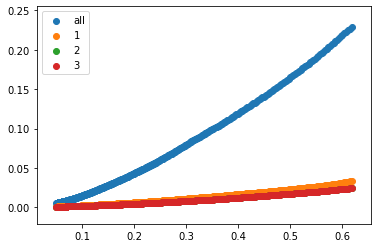

In [55]:
# use time-average of bfield
with open(dataset_pathstem[mach_no] + 'steady_bfield3D.pkl', 'rb') as f:
    data3D_bfield = pkl.load(f)
with open(dataset_pathstem[mach_no] + 'steady_absBcc13D.pkl', 'rb') as f:
    data3D_bcc1 = pkl.load(f)
with open(dataset_pathstem[mach_no] + 'steady_absBcc23D.pkl', 'rb') as f:
    data3D_bcc2 = pkl.load(f)
with open(dataset_pathstem[mach_no] + 'steady_absBcc33D.pkl', 'rb') as f:
    data3D_bcc3 = pkl.load(f)
with open(dataset_pathstem[mach_no] + 'steady_rho3D.pkl', 'rb') as f:
    data3D_rho = pkl.load(f)

phi, theta, r = data3D_bfield.phi, data3D_bfield.theta, data3D_bfield.r
phi, theta, r = np.meshgrid(phi, theta, r, indexing='ij')
    
midplane_mask3D = (np.abs(theta-0.5*np.pi) < 0.5/mach_no)

bfield_avg = np.ma.array(data3D_bfield.val, mask=np.invert(midplane_mask3D))
bcc1_avg = np.ma.array(data3D_bcc1.val, mask=np.invert(midplane_mask3D))
bcc2_avg = np.ma.array(data3D_bcc2.val, mask=np.invert(midplane_mask3D))
bcc3_avg = np.ma.array(data3D_bcc3.val, mask=np.invert(midplane_mask3D))
rho_avg = np.ma.array(data3D_rho.val, mask=np.invert(midplane_mask3D))

bfield_avg = np.mean(bfield_avg, axis=(0,1))
bcc1_avg = np.mean(bcc1_avg, axis=(0,1))
bcc2_avg = np.mean(bcc2_avg, axis=(0,1))
bcc3_avg = np.mean(bcc3_avg, axis=(0,1))
rho_avg = np.mean(data3D_rho.val, axis=(0,1))
r_avg = np.mean(r, axis=(0,1))

valfven_avg = bfield_avg / np.sqrt(rho_avg)
va1_avg = np.abs(bcc1_avg / np.sqrt(rho_avg))
va2_avg = np.abs(bcc2_avg / np.sqrt(rho_avg))
va3_avg = np.abs(bcc3_avg / np.sqrt(rho_avg))
omega_local = np.sqrt(GM1/r_avg**3)
lambda_mri = 2.*np.pi*np.sqrt(16./15.)*valfven_avg / omega_local
lambda_mri1 = 2.*np.pi*np.sqrt(16./15.)*va1_avg / omega_local
lambda_mri2 = 2.*np.pi*np.sqrt(16./15.)*va2_avg / omega_local
lambda_mri3 = 2.*np.pi*np.sqrt(16./15.)*va3_avg / omega_local

avg = pd.DataFrame(np.array([r_avg, valfven_avg, lambda_mri, va1_avg, lambda_mri1, va2_avg, lambda_mri2, va3_avg, lambda_mri3]).transpose(), columns=['x1f', 'valfven', 'lambda_mri', 'va1', 'lambda_mri1', 'va2', 'lambda_mri2', 'va3', 'lambda_mri3'])
print(avg.head())

plt.clf()
plt.scatter(r_avg, lambda_mri, label='all')
plt.scatter(r_avg, lambda_mri1, label='1')
plt.scatter(r_avg, lambda_mri2, label='2')
plt.scatter(r_avg, lambda_mri2, label='3')
#plt.gca().set_yscale('log')
#plt.ylim(1.0e-7, 1.)
plt.legend()
plt.show()
plt.close()

In [56]:
def resMRI (x, avg_df):
    result = []
    for i in [1,2,3]:
        lambda_mri = avg_df[np.abs(avg_df.x1f - x.x1f) < 1.0e-5]['lambda_mri%i'%i].iloc[0]
        result.append(lambda_mri / x['dx%i'%i])
    return pd.Series(result, index=['resMRI1','resMRI2','resMRI3'])

In [57]:
mri = df.apply(lambda x : resMRI(x, avg), axis=1)

In [58]:
mri.describe()

,resMRI1,resMRI2,resMRI3
count,70336.000000,70336.000000,70336.000000
mean,5.391402,3.107436,15.002358
std,0.355670,0.381714,2.088899
min,4.784555,2.517619,11.604862
25%,5.090226,2.785046,13.194086
50%,5.374745,3.066174,14.901772
75%,5.694541,3.433357,16.805146
max,6.112050,3.840676,18.846533


In [59]:
resMRI1 = mri.resMRI1
resMRI2 = mri.resMRI2
resMRI3 = mri.resMRI3

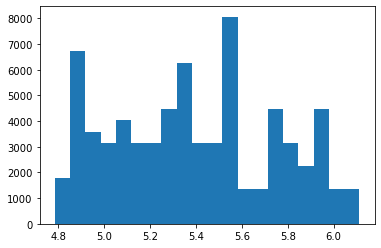

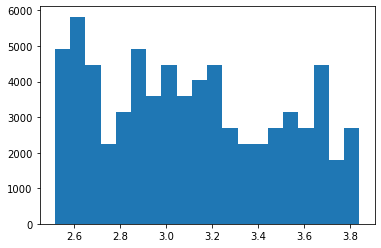

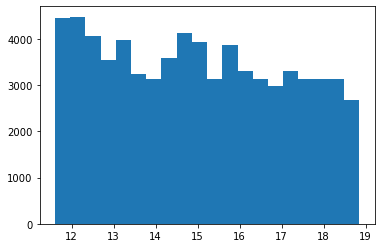

In [60]:
fig = plt.figure()
plt.hist(resMRI1, bins=20)
#plt.gca().set_xscale('log')
plt.show()
plt.close()

fig = plt.figure()
plt.hist(resMRI2, bins=20)
#plt.gca().set_xscale('log')
plt.show()
plt.close()

fig = plt.figure()
plt.hist(resMRI3, bins=20)
#plt.gca().set_xscale('log')
plt.show()
plt.close()